In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [68]:
normal_points = stats.multivariate_normal.rvs(mean = [0,0], cov = [[1,0.2], [0.2,1]], size = 100)
outlier_points = stats.multivariate_normal.rvs(mean = [2,2], cov = [[0.5,0], [0,0.5]], size = 5)
data = np.vstack((normal_points, outlier_points))
data = np.hstack((data, np.repeat(['b','r'], [100,5]).reshape(-1,1)))
data_df = pd.DataFrame(data, columns = ['x', 'y', 'color']).astype(
    dtype = {'x':np.float, 'y':np.float})

In [65]:
data_df.head()

,x,y,color
0,-0.659000,1.156941,b
1,-0.369910,0.336375,b
2,1.853093,1.232034,b
3,0.455346,1.832220,b
4,0.468783,0.015096,b


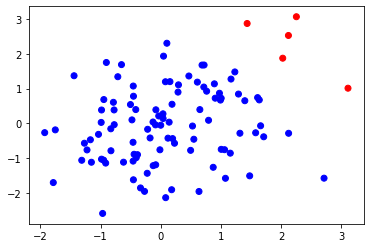

In [69]:
plt.scatter(data_df.x, data_df.y, c = data_df.color)

In [139]:
model = IsolationForest(max_samples =5)

In [140]:
model.fit(data_df[['x','y']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=5, n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

In [141]:
dir(model.estimators_[0])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_validate_X_predict',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_classes_',
 'n_features_',
 'n_outputs_',
 'predict',
 'p

In [147]:
model.estimators_[0].tree_.threshold,model.estimators_[0].tree_.feature,\

(array([-1.96287059, -2.        , -0.52283228, -2.        ,  1.29367203,
        -2.        , -2.        ]),
 array([ 1, -2,  1, -2,  1, -2, -2], dtype=int64))

In [143]:
model.estimators_[0].tree_.children_left,model.estimators_[0].tree_.children_right

(array([ 1, -1,  3, -1,  5, -1, -1], dtype=int64),
 array([ 2, -1,  4, -1,  6, -1, -1], dtype=int64))

In [146]:
print(export_text(model.estimators_[0],feature_names = ['x', 'y'] ))

|--- y <= -1.96
|   |--- value: [0.54]
|--- y >  -1.96
|   |--- y <= -0.52
|   |   |--- value: [0.42]
|   |--- y >  -0.52
|   |   |--- y <= 1.29
|   |   |   |--- value: [0.51]
|   |   |--- y >  1.29
|   |   |   |--- value: [0.21]



In [103]:
from sklearn.tree import export_text